# COVID-19 infection prediction from symptoms

# Table of contents

 ## 1) Introduction and motivation
 ## 2) Data exploration for finding relevant variables
       2.1) General info about the data
       2.2) Data cleaning and feature selection
 ## 3) Modelling the likelihood of being COVID-19 positive from data
       3.1) Creating "Random Forest" classifier
       3.2) Creating "K Nearest Neighbour" classifier
       3.3) Creating "Gradient Boosting" classfier
 ## 4) Comparison of different modelling approaches and validation
       4.1) Comparison of created models
       4.2) Final model creation
 ## 5) Outcome of the project

# 1 - Introduction and motivation


COVID – 19 has been a huge disaster for the whole world. Breaking in our lives in the beginning of 2020 it changed all the aspects of it. Economics of all the countries suffered hugely, and also the population of the people decreased a lot, because nothing was known about the virus, people weren’t ready for it which lead to big number of deaths.
Although vaccination has already started now, it is still very important to be able to diagnose COVID-19 in early stages so that a help could be given to people and number of deaths will be reduces.
  The motivation for this project is to create a machine learning algorithm with the help of a data with information about COVID-19 symptoms and some other economical and regional factors from Brazil, which will take as an input all that information and will give a probability whether that person is likely to test positive or not. All that will help to diagnose the virus at an early stages and can help governments to define strategies that will reduce the bad impact from the virus on the country and its population.

# 2 - Data exploration for finding relevant variables

## 2.1 - General info about the data

We will simply look at some graps of chosen features from the data to get general knowledge about it. After it in the next section we will start more scientific part and will find out which features are more important.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import matplotlib as mpl

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# Setting the number of the columns shown in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
# Importing the datasets

df_05 = pd.read_csv("Datasets/PNAD_COVID_052020.csv")
df_06 = pd.read_csv("Datasets/PNAD_COVID_062020.csv")
df_07 = pd.read_csv("Datasets/PNAD_COVID_072020.csv")
df_08 = pd.read_csv("Datasets/PNAD_COVID_082020.csv")
df_09 = pd.read_csv("Datasets/PNAD_COVID_092020.csv")
df_10 = pd.read_csv("Datasets/PNAD_COVID_102020.csv")
df_11 = pd.read_csv("Datasets/PNAD_COVID_112020.csv")

# Creating a dataframe containing the info from all the months
df = pd.DataFrame(columns=df_11.columns)
df = df.append([df_05, df_06, df_07, df_08, df_09, df_10, df_11], ignore_index=True)
df

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,V1023,V1030,V1031,V1032,posest,A001,A001A,A001B1,A001B2,A001B3,A002,A003,A004,A005,A006,A006A,A006B,A007,A007A,A008,A009,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B002,B0031,B0032,B0033,B0034,B0035,B0036,B0037,B0041,B0042,B0043,B0044,B0045,B0046,B005,B006,B007,B008,B009A,B009B,B009C,B009D,B009E,B009F,B0101,B0102,B0103,B0104,B0105,B0106,B011,C001,C002,C003,C004,C005,C0051,C0052,C0053,C006,C007,C007A,C007B,C007C,C007D,C007E,C007E1,C007E2,C007F,C008,C009,C009A,C010,C0101,C01011,C01012,C0102,C01021,C01022,C0103,C0104,C011A,C011A1,C011A11,C011A12,C011A2,C011A21,C011A22,C012,C013,C014,C015,C016,C017A,D0011,D0013,D0021,D0023,D0031,D0033,D0041,D0043,D0051,D0053,D0061,D0063,D0071,D0073,E001,E0021,E0022,E0023,E0024,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
0,2020,11,11.0,NaN,1,4,5,1,1110011,110015970,1,1,152194,138.256241,143.562745,1114,1,1,5,8,1984,35,1,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2,2,1,2,2,2,2,2,1,2,NaN,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,35.0,6.0,NaN,NaN,NaN,NaN,48.0,48.0,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
1,2020,11,11.0,NaN,1,4,5,1,1110011,110015970,1,1,154290,138.256241,155.175570,1123,2,2,18,8,1990,29,2,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2,2,2,2,2,2,2,2,1,2,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.0,NaN,NaN,34.0,22.0,NaN,NaN,NaN,NaN,12.0,4.0,NaN,1.0,1.0,4.0,1045.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
2,2020,11,11.0,NaN,1,4,5,1,1110011,110015970,1,1,146160,138.256241,191.786214,1112,3,4,25,12,2006,13,1,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
3,2020,11,11.0,NaN,1,4,5,1,1110011,110015970,1,1,146160,138.256241,191.786214,1112,4,4,24,8,2009,10,1,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,1200.0,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
4,2020,11,11.0,NaN,3,2,5,1,1110011,110015970,1,1,90903,138.256241,144.134929,1126,1,1,25,12,1961,58,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,2,NaN,2,NaN,1,130.0,2,NaN,1,600.0,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### Distribution of survey takers by federation unit

Text(0, 0.5, 'Number of survey takers')

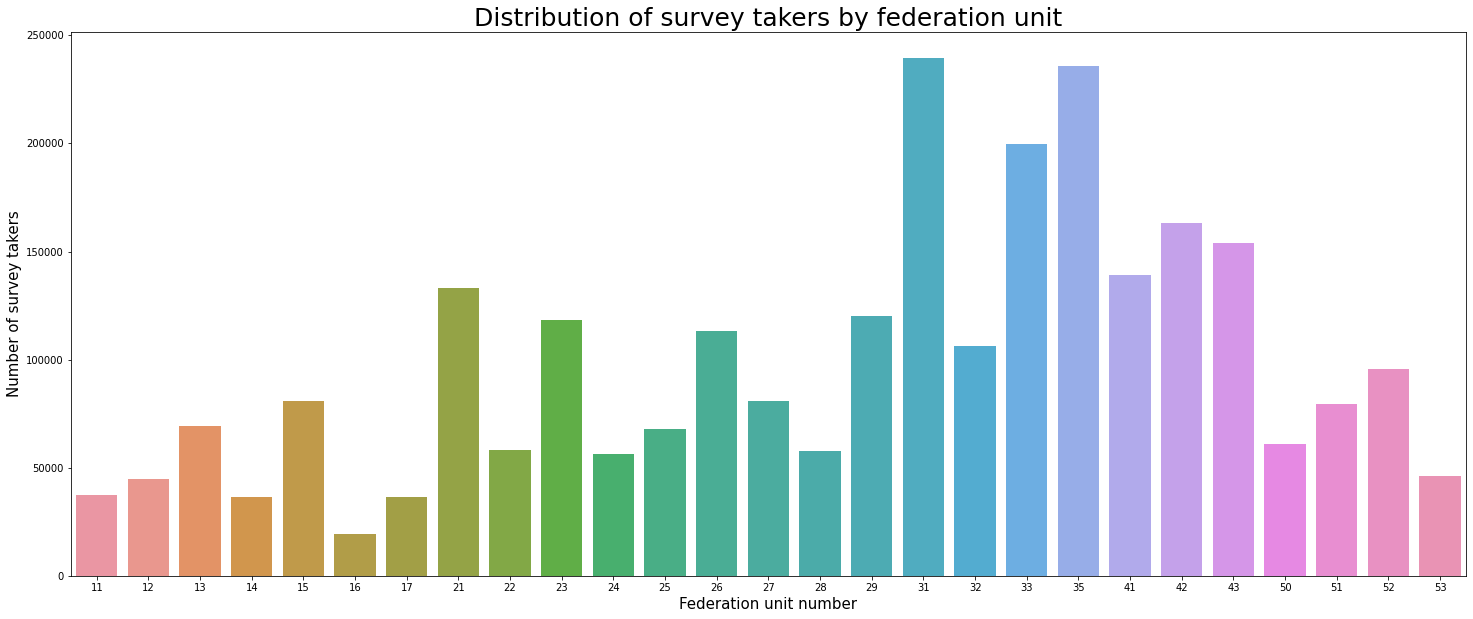

In [4]:
plt.figure(figsize=(25,10))
sns.countplot(df["UF"]).set_title("Distribution of survey takers by federation unit", fontdict={"fontsize": 25})
plt.xlabel("Federation unit number", fontdict={"fontsize": 15})
plt.ylabel("Number of survey takers", fontdict={"fontsize": 15})

We can notice that most of the survey takers have been from federation units 31 and 35, which are Minas Gerais and Sao Paolo

### Distribution of survey takers by area type

Text(0, 0.5, 'Number of survey takers (hundreed thousand)')

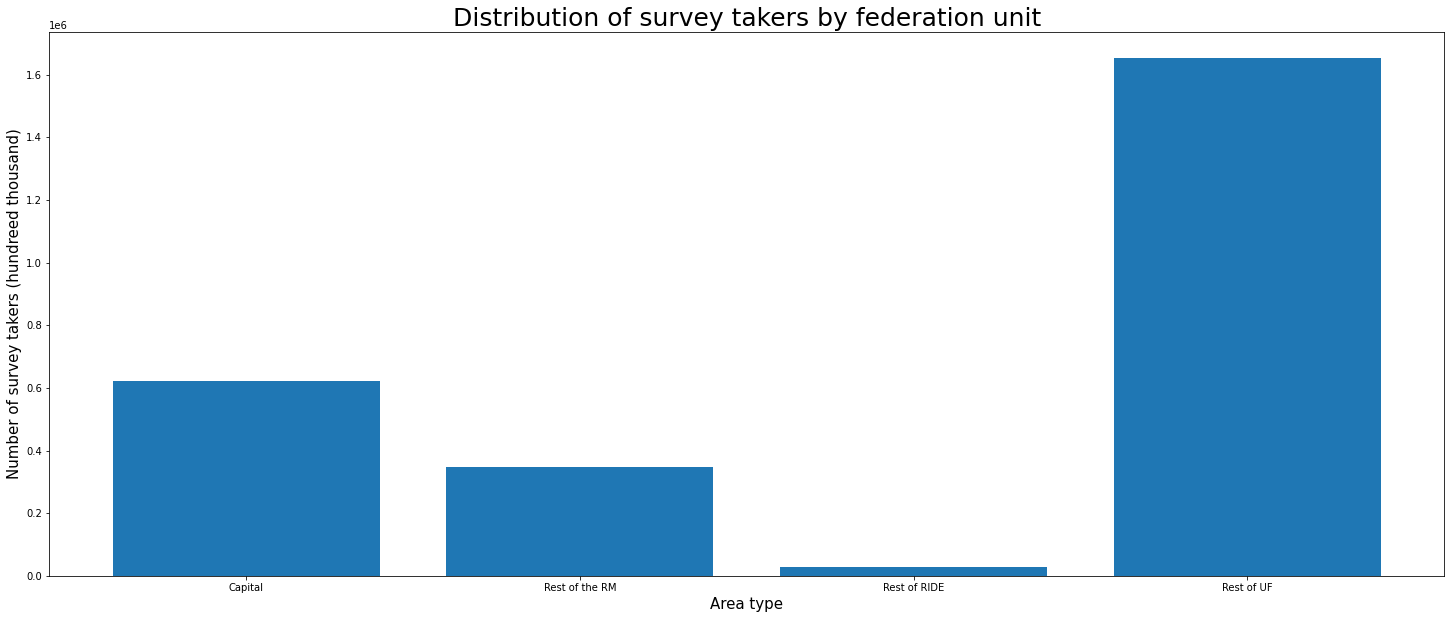

In [5]:
plt.figure(figsize=(25,10))

labels = ["Capital", "Rest of the RM", "Rest of RIDE", "Rest of UF"]
counts = [len(df[df["V1023"] == 1]), len(df[df["V1023"] == 2]), len(df[df["V1023"] == 3]), len(df[df["V1023"] == 4])]

plt.bar(labels, counts)
plt.title("Distribution of survey takers by federation unit", fontdict={"fontsize": 25})
plt.xlabel("Area type", fontdict={"fontsize": 15})
plt.ylabel("Number of survey takers (hundreed thousand)", fontdict={"fontsize": 15})

Most of the survey takers are from "Rest of UF" category, meaning the territory of the UF exculding metropolitan region anc ride.

### Sistribution of survey takers based on home condition.

Text(0, 0.5, 'Number of survey takers')

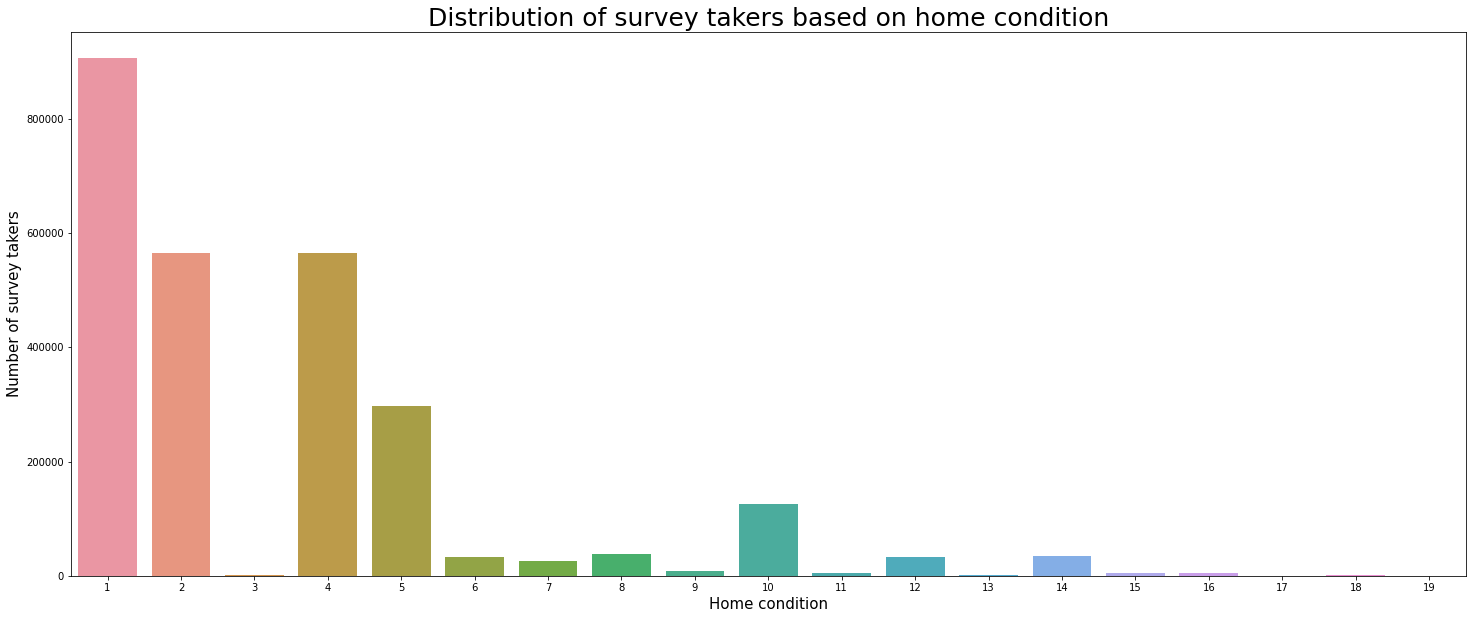

In [6]:
plt.figure(figsize=(25,10))
sns.countplot(df["A001A"]).set_title("Distribution of survey takers based on home condition", fontdict={"fontsize": 25})
plt.xlabel("Home condition", fontdict={"fontsize": 15})
plt.ylabel("Number of survey takers", fontdict={"fontsize": 15})

Most of the people are from category 1, which is "Person responsible for the househpld.

### Distribution of people by age and gender.

([<matplotlib.patches.Wedge at 0x7fd84a8bf130>,
 [Text(0.07006023368752667, 1.0977666253150755, 'Men'),
  Text(-0.07006033646785585, -1.0977666187555581, 'Women')],
 [Text(0.038214672920469095, 0.5987817956264048, '48.0%'),
  Text(-0.03821472898246682, -0.5987817920484861, '52.0%')])

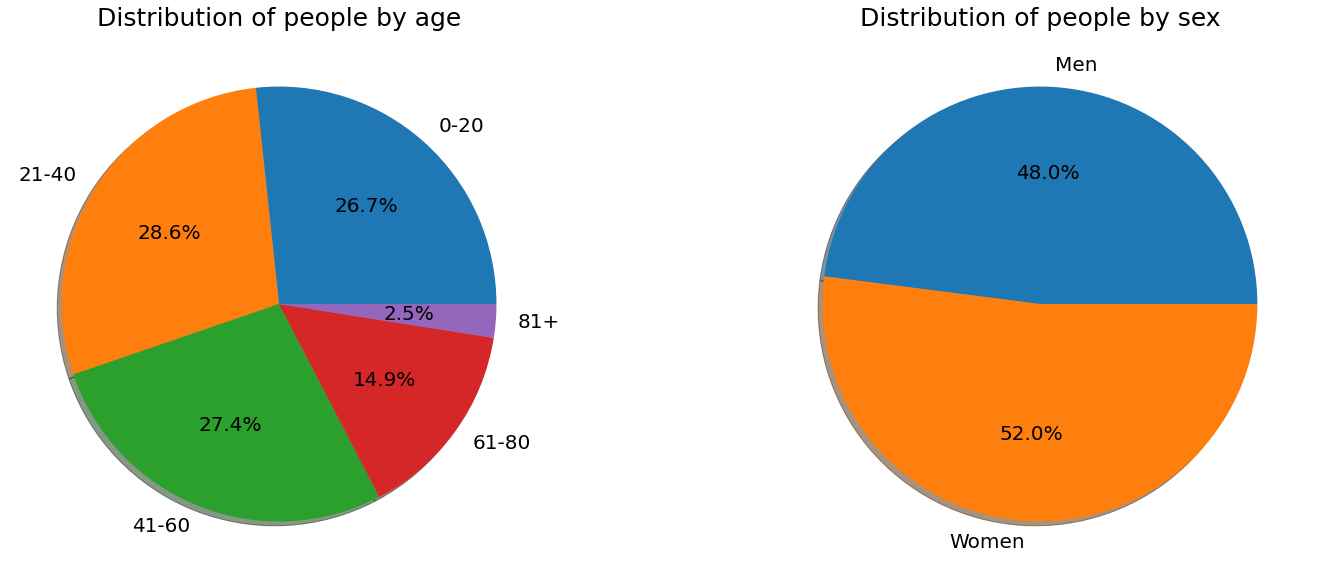

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25,10))

labels_a = ["0-20", "21-40", "41-60", "61-80", "81+"]
counts_a = [len(df[(df["A002"] >= 0) & (df["A002"] < 20)]), len(df[(df["A002"] >= 20) & (df["A002"] < 40)]), len(df[(df["A002"] >= 40) & (df["A002"] < 60)]), len(df[(df["A002"] >= 60) & (df["A002"] < 80)]), len(df[df["A002"] >= 80])]
labels_b = ["Men", "Women"]
counts_b = [len(df[df["A003"] == 1]), len(df[df["A003"] == 2])]

ax[0].set_title("Distribution of people by age", fontdict={"fontsize": 25})
ax[0].pie(counts_a, labels=labels_a, shadow=True, autopct="%1.1f%%", textprops={'fontsize': 20})

ax[1].set_title("Distribution of people by sex", fontdict={"fontsize": 25})
ax[1].pie(counts_b, labels=labels_b, shadow=True, autopct="%1.1f%%", textprops={'fontsize': 20})

Most of people are in age group of "21-40", and number of men and women taking the survey is almost equal.

### Statistics about symptoms

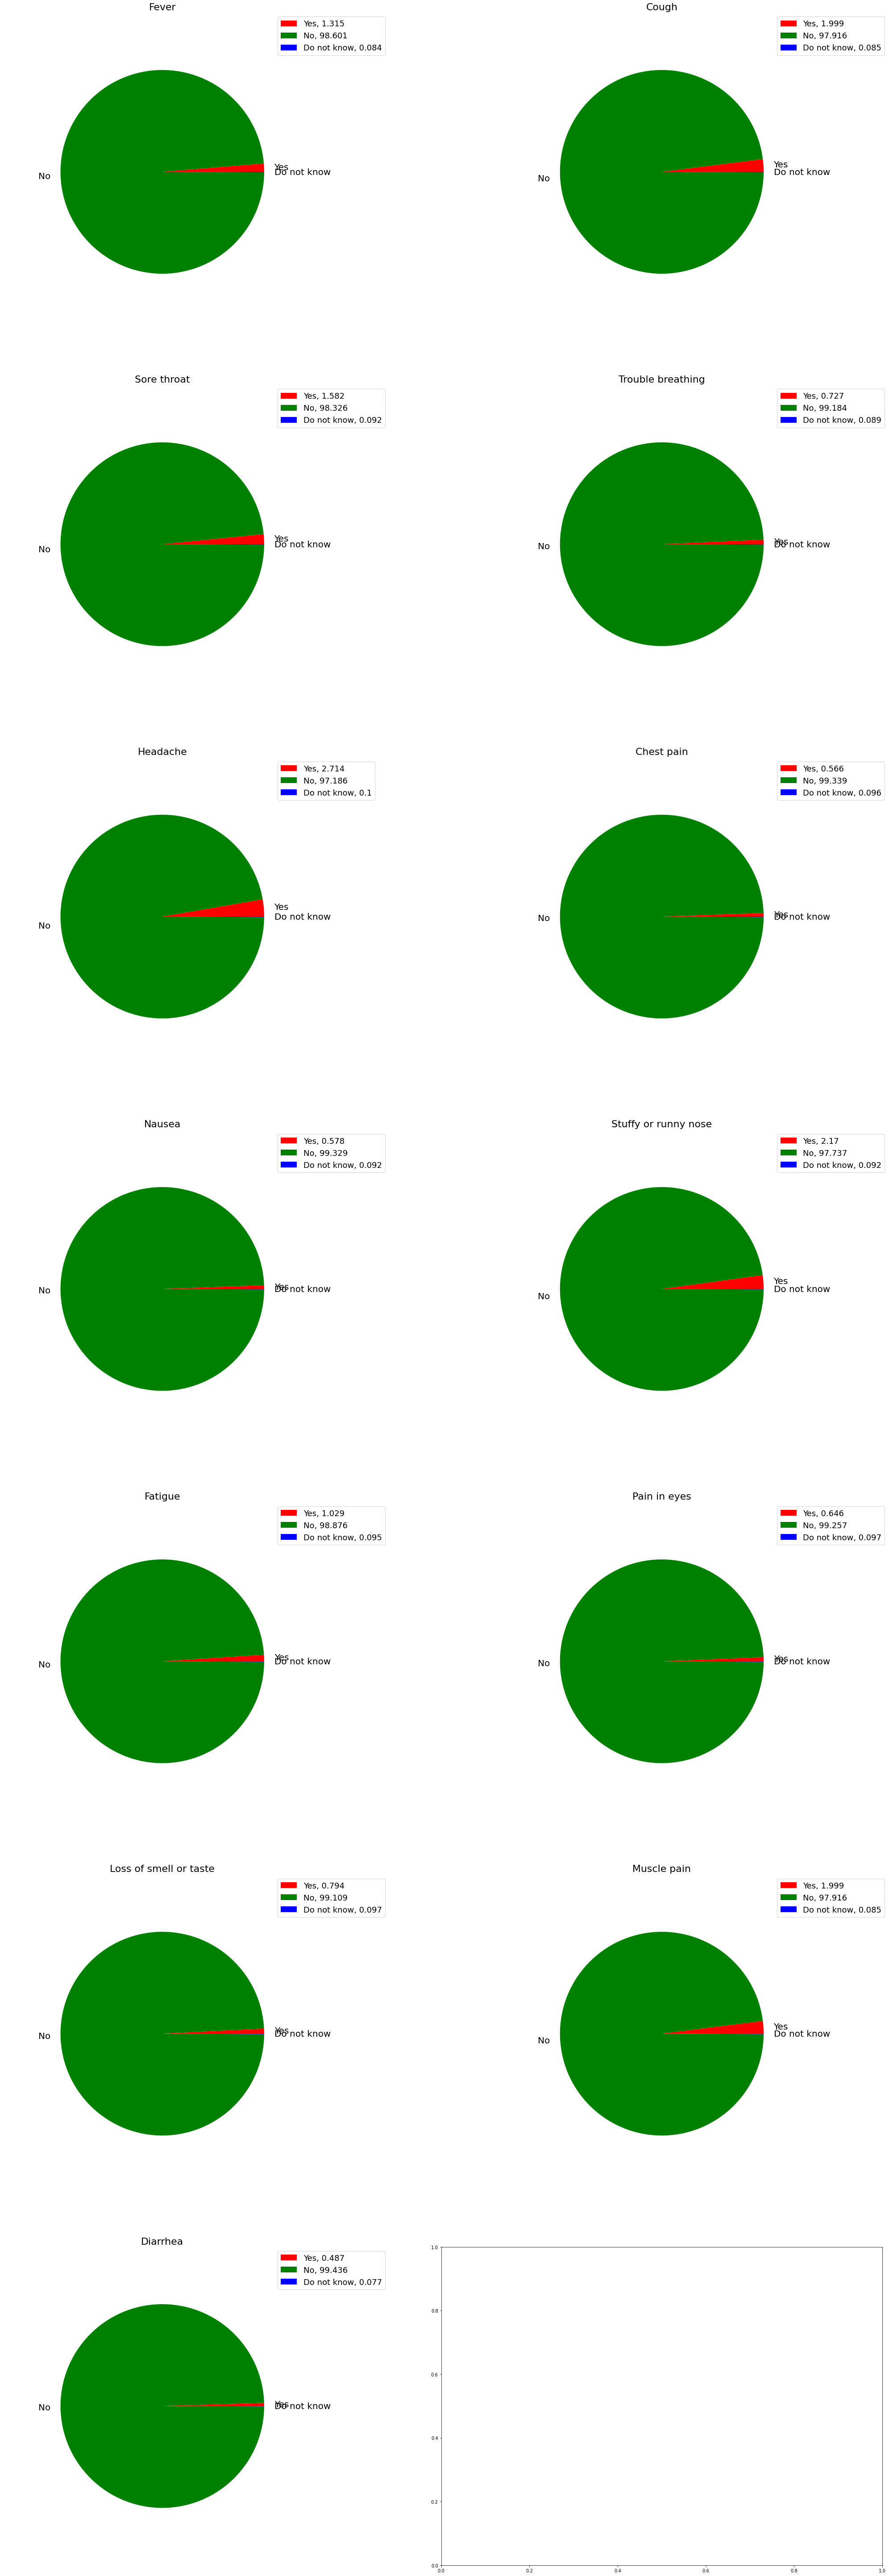

In [8]:
def find_percent(var):
    yes = len(df[df[var] == 1][var])
    no = len(df[df[var] == 2][var])
    dnk = len(df[df[var] == 3][var])

    yes_perc = yes / (yes + no + dnk)
    no_perc = no / (yes + no + dnk)
    dnk_perc = dnk / (yes + no + dnk)

    return yes_perc, no_perc, dnk_perc

fig, axs = plt.subplots(7, 2)
fig.set_figwidth(30)
fig.set_figheight(80)
fig.tight_layout(h_pad = 10, w_pad=10)

symptoms = ["B0011", "B0012", "B0013", "B0014", "B0015", "B0016", "B0017", "B0018", "B0019", "B00110", "B00111", "B0012", "B00113"]
symptoms_names = ["Fever", "Cough", "Sore throat", "Trouble breathing", "Headache", "Chest pain", "Nausea", "Stuffy or runny nose", "Fatigue", "Pain in eyes", "Loss of smell or taste", "Muscle pain", "Diarrhea"]
n = 0

for i in range(0, 7):
    perc = find_percent(symptoms[n])
    labels = ["Yes, " + str(round(perc[0] * 100, 3)), "No, " + str(round(perc[1] * 100, 3)), "Do not know, " + str(round(perc[2]* 100, 3))]
    axs[i][0].pie(perc, labels=["Yes", "No", "Do not know"], textprops={'fontsize': 20}, radius=0.8, colors=["r", "g", "b"])
    axs[i][0].set_title(symptoms_names[n], fontsize=22)
    axs[i][0].legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels, fontsize=18)

    if i != 6:
        perc = find_percent(symptoms[n+1])
        labels = ["Yes, " + str(round(perc[0] * 100, 3)), "No, " + str(round(perc[1] * 100, 3)), "Do not know, " + str(round(perc[2]* 100, 3))]
        axs[i][1].pie(perc, labels=["Yes", "No", "Do not know"], textprops={'fontsize': 20}, radius=0.8, colors=["r", "g", "b"])
        axs[i][1].set_title(symptoms_names[n+1], fontsize=22)
        axs[i][1].legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels, fontsize=18)

    n += 2

### Distribution of COVID test results

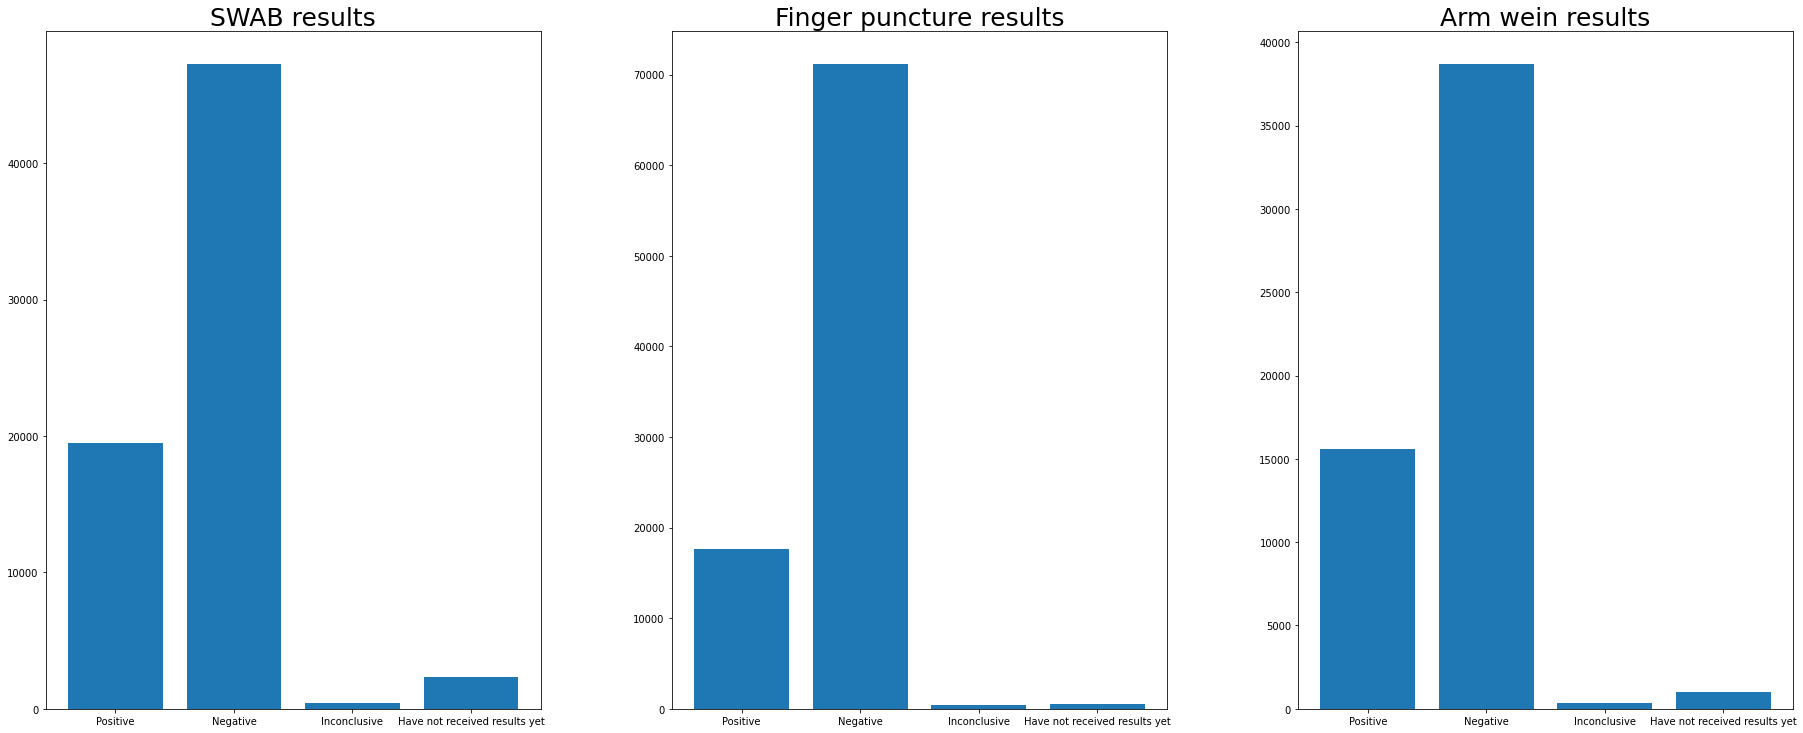

In [9]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(25,10))
fig.tight_layout(h_pad = 0, w_pad=10)

tests = ["SWAB", "Finger puncture", "Arm wein"]
vars = ["B009B", "B009D", "B009F"]

labels = ["Positive", "Negative", "Inconclusive", "Have not received results yet"]

counts = [[], [], []]
for i in range(0, 3):
    for j in range(1, 5):
        counts[i].append(len(df[df[vars[i]] == j]))
    
    ax[i].set_title(tests[i] + " results", fontdict={"fontsize": 25})
    ax[i].bar(labels, counts[i])

### Number of people being temporarily away from work during the previous week.

([<matplotlib.patches.Wedge at 0x7fd7ba450280>,
 [Text(1.030030427698908, 0.38605351703410845, 'Yes'),
  Text(-1.0300304096264377, -0.38605356525331214, 'No')],
 [Text(0.5618347787448589, 0.21057464565496822, '11.4%'),
  Text(-0.5618347688871477, -0.21057467195635204, '88.6%')])

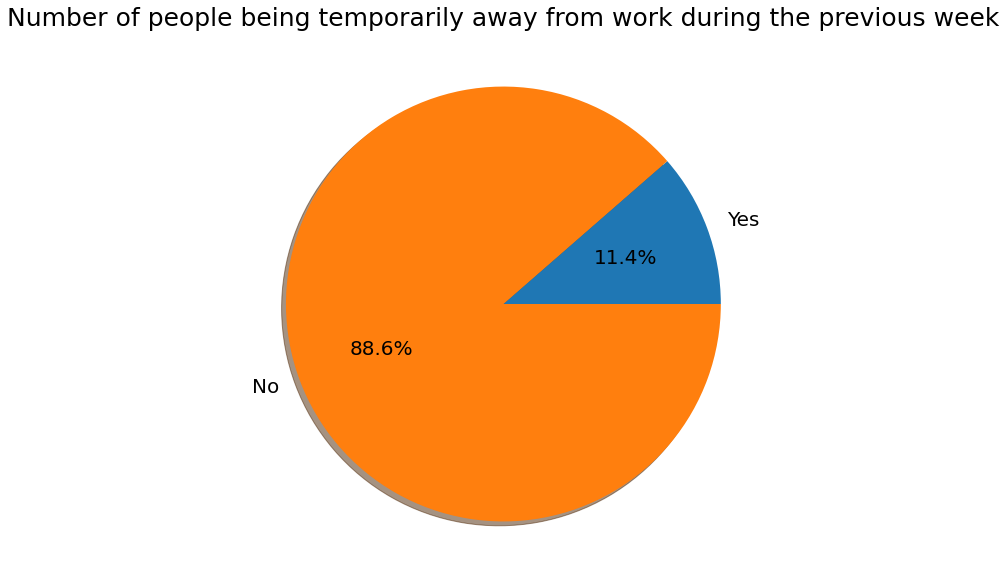

In [10]:
plt.figure(figsize=(25,10))

labels = ["Yes", "No"]
counts = [len(df[df["C002"] == 1]), len(df[df["C002"] == 2])]

plt.title("Number of people being temporarily away from work during the previous week", fontdict={"fontsize": 25})
plt.pie(counts, labels=labels, shadow=True, autopct="%1.1f%%", textprops={'fontsize': 20})

We can notice that only 11.4% of people have been away from work during the past week from the survey.

### Reasons for being temporarily away from work

Text(0, 0.5, 'Number of survey takers')

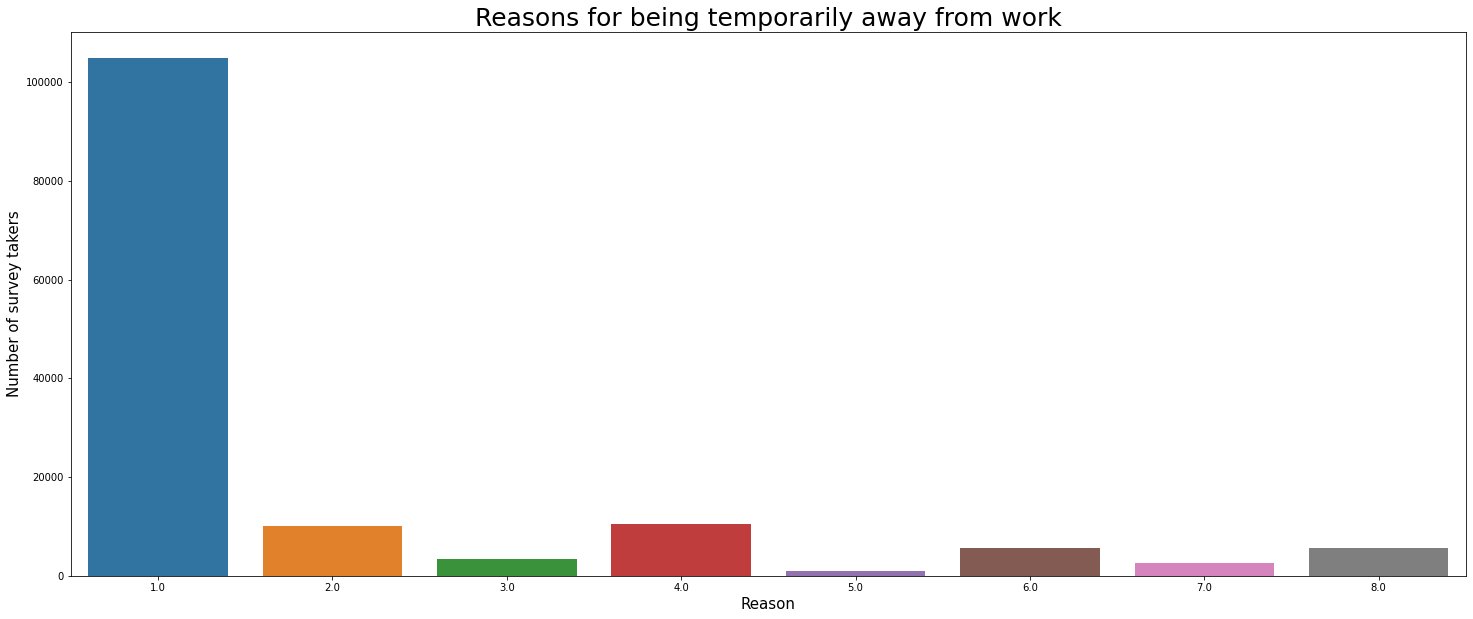

In [11]:
plt.figure(figsize=(25,10))
sns.countplot(df["C003"]).set_title("Reasons for being temporarily away from work", fontdict={"fontsize": 25})
plt.xlabel("Reason", fontdict={"fontsize": 15})
plt.ylabel("Number of survey takers", fontdict={"fontsize": 15})

The categories:
1 - I was in quarantine, isolation, social distancing or collective vacations,
2 - Vacation, time off or variable working hours,
3 - Maternity or paternity leave,
4 - Paid leave due to the person's own health or accident,
5 - Other type of paid leave (study, paternity, marriage, premium leave, etc.),
6 - Withdrawal from the business/company due to pregnancy, health, accident, etc., without being paid by a social security institute,
7 - Occasional factors (bad weather, stoppage in transport services, etc.),
8 - Another motive.

No when we are done with getting acquianted with the most important features of the data, we can start data cleaning and feature selection process.

## 2.2 - Data cleaning and feature selection

We will logically select 30-40 important features, and then will do mathematical analysis to keep the most important ones.

### Dropping the rows where we don't have any info about COVID test results.

In [4]:
df = df.dropna(how="all", subset=["B009B", "B009D", "B009F"])
df

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,V1023,V1030,V1031,V1032,posest,A001,A001A,A001B1,A001B2,A001B3,A002,A003,A004,A005,A006,A006A,A006B,A007,A007A,A008,A009,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B002,B0031,B0032,B0033,B0034,B0035,B0036,B0037,B0041,B0042,B0043,B0044,B0045,B0046,B005,B006,B007,B008,B009A,B009B,B009C,B009D,B009E,B009F,B0101,B0102,B0103,B0104,B0105,B0106,B011,C001,C002,C003,C004,C005,C0051,C0052,C0053,C006,C007,C007A,C007B,C007C,C007D,C007E,C007E1,C007E2,C007F,C008,C009,C009A,C010,C0101,C01011,C01012,C0102,C01021,C01022,C0103,C0104,C011A,C011A1,C011A11,C011A12,C011A2,C011A21,C011A22,C012,C013,C014,C015,C016,C017A,D0011,D0013,D0021,D0023,D0031,D0033,D0041,D0043,D0051,D0053,D0061,D0063,D0071,D0073,E001,E0021,E0022,E0023,E0024,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
730581,2020,11,11.0,NaN,4,4,7,3,1110011,110015970,1,1,122744,130.595605,165.550657,1115,1,1,18,2,1973,47,1,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,2.0,NaN,1.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN,2.0,7.0,NaN,NaN,18.0,5.0,NaN,NaN,NaN,NaN,44.0,0.0,NaN,1.0,1.0,5.0,2000.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,600.0,2,NaN,2,NaN,3.0,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1,1.0
730594,2020,11,11.0,NaN,7,3,7,3,1110011,110015970,1,1,152452,130.595605,149.671109,1114,1,1,30,5,1986,34,1,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,2.0,NaN,2.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,8.0,5.0,NaN,NaN,NaN,NaN,44.0,44.0,NaN,1.0,1.0,4.0,1500.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,1500.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,3.0,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1,1.0
730601,2020,11,11.0,NaN,9,3,7,3,1110011,110015970,1,1,122744,130.595605,165.550657,1115,1,1,12,4,1976,44,1,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,2.0,NaN,2.0,NaN,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,2.0,2.0,34.0,18.0,NaN,NaN,NaN,NaN,30.0,22.0,1.0,1.0,1.0,6.0,5500.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,6.0,5500.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,3.0,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1,1.0
730605,2020,11,11.0,NaN,10,4,7,3,1110011,110015970,1,1,56060,130.595605,135.372954,1117,1,1,99,99,9999,64,1,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,2.0,NaN,1.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,5.0,1.0,2.0,14.0,18.0,NaN,NaN,NaN,NaN,30.0,0.0,NaN,1.0,1.0,5.0,3000.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,1,130.0,2,NaN,1,1200.0,2,NaN,2,NaN,3.0,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1,3.0
730606,2020,11,11.0,NaN,10,4,7,3,1110011,110015970,1,1,125121,130.595605,124.671489,1125,2,2,24,9,1973,46,2,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,2.0,NaN,1.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,8.0,2.0,2,NaN,2,NaN,1,130.0,2,NaN,1,1200.0,2,NaN,2,NaN,3.0,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

We have only 185921 rowa where there is info about results of the COVID tests, so we will continue our analysis on that part of the data.

### Logically selecting important features

UF - Federation unit - The risk of being tested positive might be different in different federation units, and this can help to make predictions/

Estrato - Survey month - The possibility of testing positive is surely different in different months, because of factors like climate, temperature and etc.

V1023 - Area type - People in different types of areas might be affected in different ways

A001A - Home condition - People of different age and position at home, can be affected differently

A002 - Resident age, which is one of the most important factors

A003  - Sex - Another important frature, that might have high effect on people.

B0011-B00113` All the symptoms

B0101 - B0106` All thr diagnoses  

C002 - Being temporarily away from work might also indicate about being ill

C007C, C007D, C007E - Type of the job can also be very important, because in some enviromenets the risk of becoming infected is higher. We can say the sume about the number of employees

C009 - Higher working hours brings higher probability of being infected

F002A1 - F002A5 - Availability of protection items at home

B009B, B009D, B009F - Results of COVID tests

In [5]:
df = df[["UF", "Estrato", "V1023", "A001A", "A002", "B0011", "B0012", "B0013", "B0014", "B0015",
 "B0016", "B0017", "B0018", "B0019", "B00110", "B00111", "B00112", "B00113", "B0101", "B0102", 
 "B0103", "B0104", "B0105", "B0106", "C002", "C007C", "C007D", "C007E", "C009", "F002A1", "F002A2",
 "F002A3", "F002A4", "F002A5", "B009B", "B009D", "B009F"]]

df

,UF,Estrato,V1023,A001A,A002,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B0101,B0102,B0103,B0104,B0105,B0106,C002,C007C,C007D,C007E,C009,F002A1,F002A2,F002A3,F002A4,F002A5,B009B,B009D,B009F
730581,11,1110011,1,1,47,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,18.0,5.0,NaN,0.0,1.0,1.0,1.0,2.0,1.0,NaN,2.0,NaN
730594,11,1110011,1,1,34,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,8.0,5.0,NaN,44.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,2.0
730601,11,1110011,1,1,44,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,34.0,18.0,NaN,22.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,4.0
730605,11,1110011,1,1,64,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,14.0,18.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,NaN
730606,11,1110011,1,2,46,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650393,53,5310220,1,4,6,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
2650394,53,5310220,1,4,3,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
2650395,53,5310220,1,18,32,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,24.0,NaN,40.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
2650423,53,5310220,1,2,48,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,36.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,NaN


Now we are left only with 34 features + 3 columns about the test results.

## Creating a column for keeping the labels

In [6]:
labels = list()

for index, row in df.iterrows():
    first = row["B009B"]
    second = row["B009D"]
    third = row["B009F"]
     
    if first in [1, 2]:
        if second in [1, 2]:
            if first != second:
                labels.append(0)
                continue
            elif third in [1, 2]:
                if first != third:
                    labels.append(0)
                    continue
        elif third in [1, 2]:
            if first != third:
                labels.append(0)
                continue
        labels.append(first)
        continue
    elif second in [1, 2]:
        if third in [1, 2]:
            if second != third:
                labels.append(0)
                continue
        labels.append(second)
        continue
    elif third in [1, 2]:
        labels.append(third)
        continue

    labels.append(0)

    
df["Labels"] = labels
df

,UF,Estrato,V1023,A001A,A002,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B0101,B0102,B0103,B0104,B0105,B0106,C002,C007C,C007D,C007E,C009,F002A1,F002A2,F002A3,F002A4,F002A5,B009B,B009D,B009F,Labels
730581,11,1110011,1,1,47,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,18.0,5.0,NaN,0.0,1.0,1.0,1.0,2.0,1.0,NaN,2.0,NaN,2.0
730594,11,1110011,1,1,34,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,8.0,5.0,NaN,44.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,2.0,2.0
730601,11,1110011,1,1,44,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,34.0,18.0,NaN,22.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,4.0,0.0
730605,11,1110011,1,1,64,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,14.0,18.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,NaN,2.0
730606,11,1110011,1,2,46,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,2.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650393,53,5310220,1,4,6,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2650394,53,5310220,1,4,3,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2650395,53,5310220,1,18,32,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,24.0,NaN,40.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
2650423,53,5310220,1,2,48,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,36.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,NaN,2.0


## Removing the 3 result columns from the dataset, and only keeping the rows where there are positive or negative results.

In [7]:
df.drop(["B009B", "B009D", "B009F"], axis=1, inplace=True)
df = df[df["Labels"] != 0]
df

,UF,Estrato,V1023,A001A,A002,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B0101,B0102,B0103,B0104,B0105,B0106,C002,C007C,C007D,C007E,C009,F002A1,F002A2,F002A3,F002A4,F002A5,Labels
730581,11,1110011,1,1,47,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,18.0,5.0,NaN,0.0,1.0,1.0,1.0,2.0,1.0,2.0
730594,11,1110011,1,1,34,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,8.0,5.0,NaN,44.0,1.0,1.0,1.0,2.0,1.0,2.0
730605,11,1110011,1,1,64,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,14.0,18.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,2.0
730606,11,1110011,1,2,46,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0
730607,11,1110011,1,6,21,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650393,53,5310220,1,4,6,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
2650394,53,5310220,1,4,3,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
2650395,53,5310220,1,18,32,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,24.0,NaN,40.0,1.0,1.0,1.0,1.0,1.0,1.0
2650423,53,5310220,1,2,48,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,36.0,1.0,1.0,1.0,2.0,1.0,2.0


## Replacing missing values with mean values of each column.

In [8]:
df = df.fillna(round(df.mean()))
df

,UF,Estrato,V1023,A001A,A002,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B00113,B0101,B0102,B0103,B0104,B0105,B0106,C002,C007C,C007D,C007E,C009,F002A1,F002A2,F002A3,F002A4,F002A5,Labels
730581,11,1110011,1,1,47,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,18.0,5.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0
730594,11,1110011,1,1,34,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0,5.0,2.0,44.0,1.0,1.0,1.0,2.0,1.0,2.0
730605,11,1110011,1,1,64,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,14.0,18.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0
730606,11,1110011,1,2,46,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,21.0,14.0,2.0,35.0,1.0,1.0,1.0,1.0,1.0,2.0
730607,11,1110011,1,6,21,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,21.0,14.0,2.0,35.0,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650393,53,5310220,1,4,6,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,21.0,14.0,2.0,35.0,1.0,1.0,1.0,1.0,1.0,1.0
2650394,53,5310220,1,4,3,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,21.0,14.0,2.0,35.0,1.0,1.0,1.0,1.0,1.0,1.0
2650395,53,5310220,1,18,32,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,24.0,2.0,40.0,1.0,1.0,1.0,1.0,1.0,1.0
2650423,53,5310220,1,2,48,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,21.0,14.0,2.0,36.0,1.0,1.0,1.0,2.0,1.0,2.0


## Creating a correlation matrix

<AxesSubplot:>

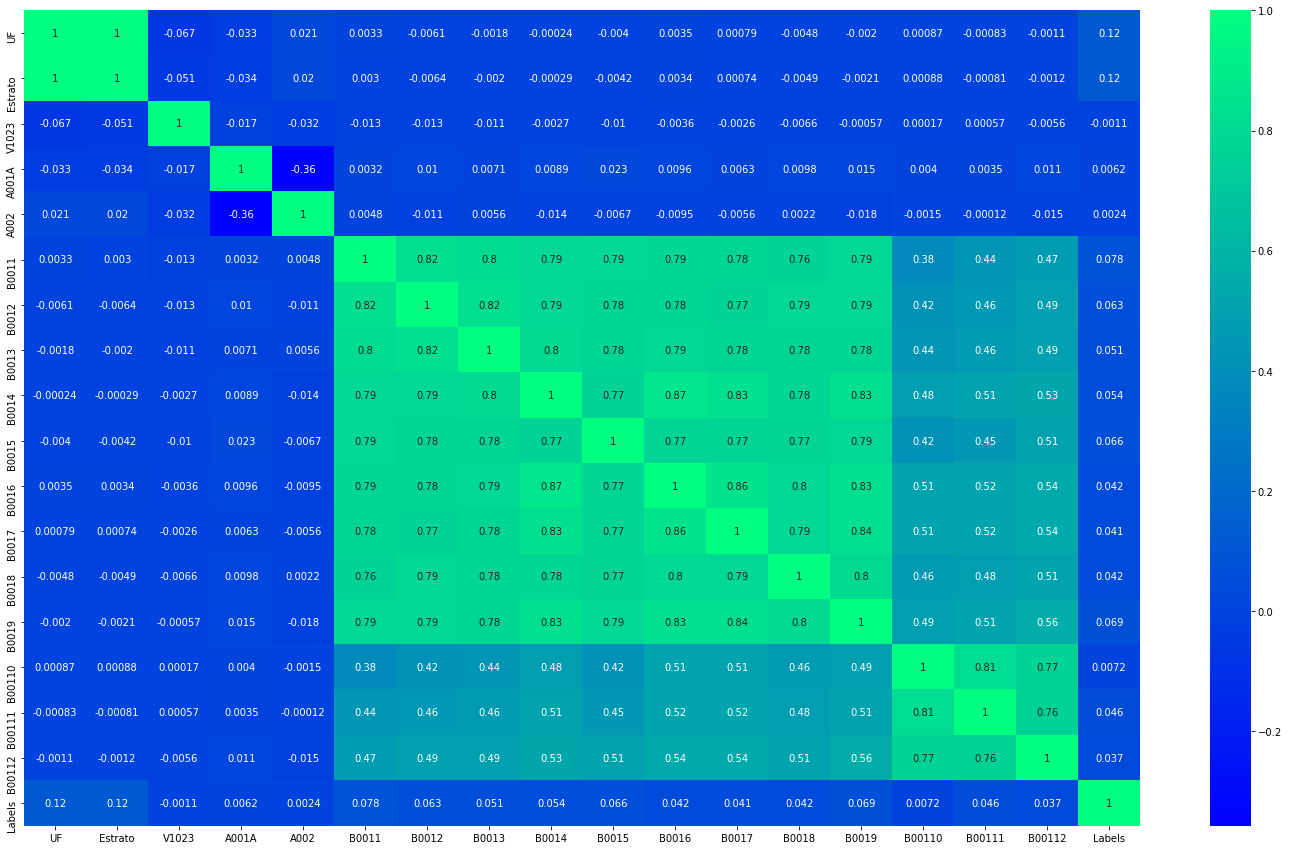

In [10]:
corr1 = df.iloc[:, 0:17]
corr1["Labels"] = df["Labels"]
corr1 = corr1.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr1, annot=True, cmap="winter")

Correlation matrix of the first 17 columns.

<AxesSubplot:>

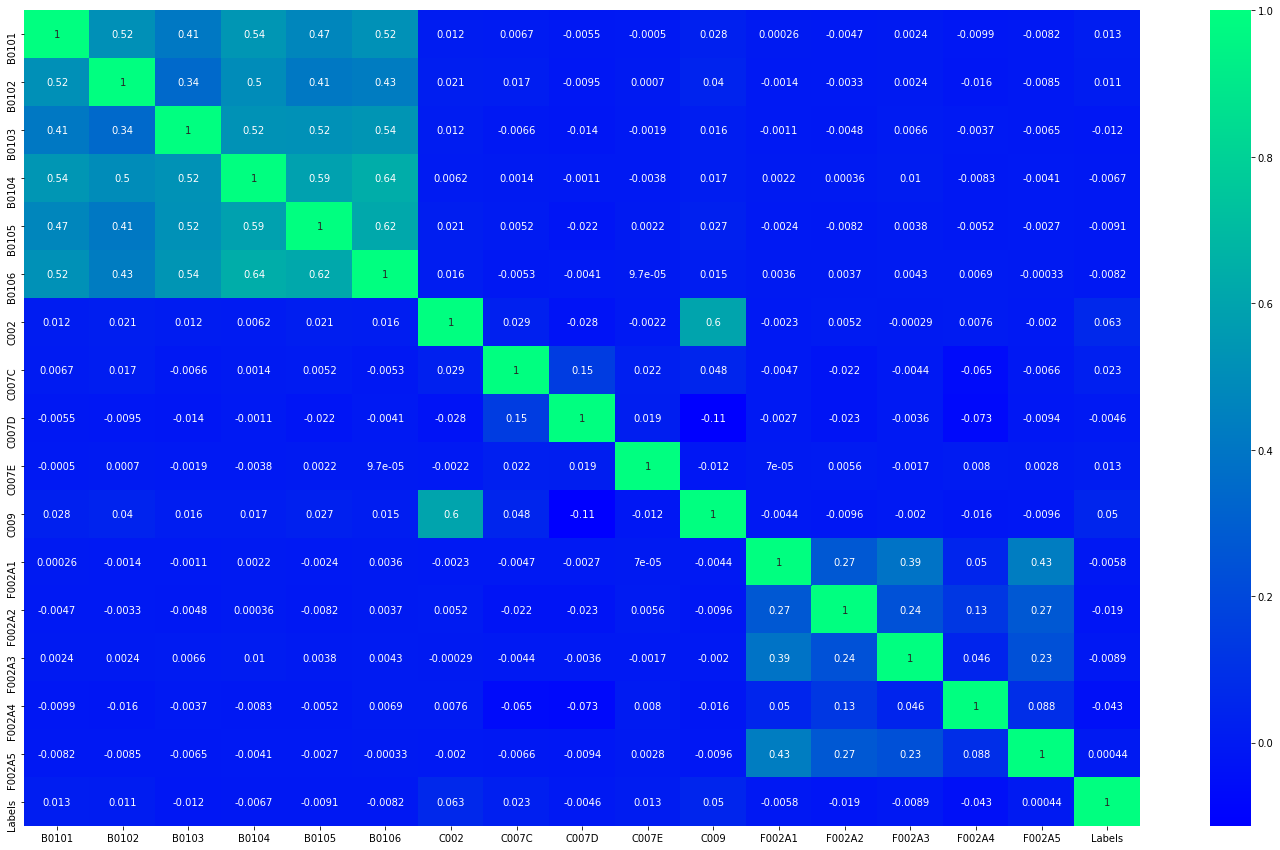

In [11]:
corr2 = df.iloc[:, 18:34]
corr2["Labels"] = df["Labels"]
corr2 = corr2.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr2, annot=True, cmap="winter")

Correlation matrix of the last 17 columns.

### Removing the features that have correlation less than 0.01.

In [12]:
corr1 = corr1[corr1["Labels"] >= 0.01]
first = list(corr1.index)[:-1]

corr2 = corr2[corr2["Labels"] >= 0.01]
second = list(corr2.index)[:-1]

labels = list(df["Labels"])
df = df[first + second]
df

,UF,Estrato,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00111,B00112,B0101,B0102,C002,C007C,C007E,C009
730581,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1.0,18.0,2.0,0.0
730594,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,8.0,2.0,44.0
730605,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1.0,14.0,2.0,0.0
730606,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,21.0,2.0,35.0
730607,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,21.0,2.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650393,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,21.0,2.0,35.0
2650394,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,21.0,2.0,35.0
2650395,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,1.0,2.0,40.0
2650423,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,21.0,2.0,36.0


Now we have only 19 features left, and the labels are kept in a separate list called "labels".

### Solving outlayer problems.

There might be some values in some columns that are too far from mean values, so they need to be removed. We will use box-plots and distribution plots to do that.

### Box-plots

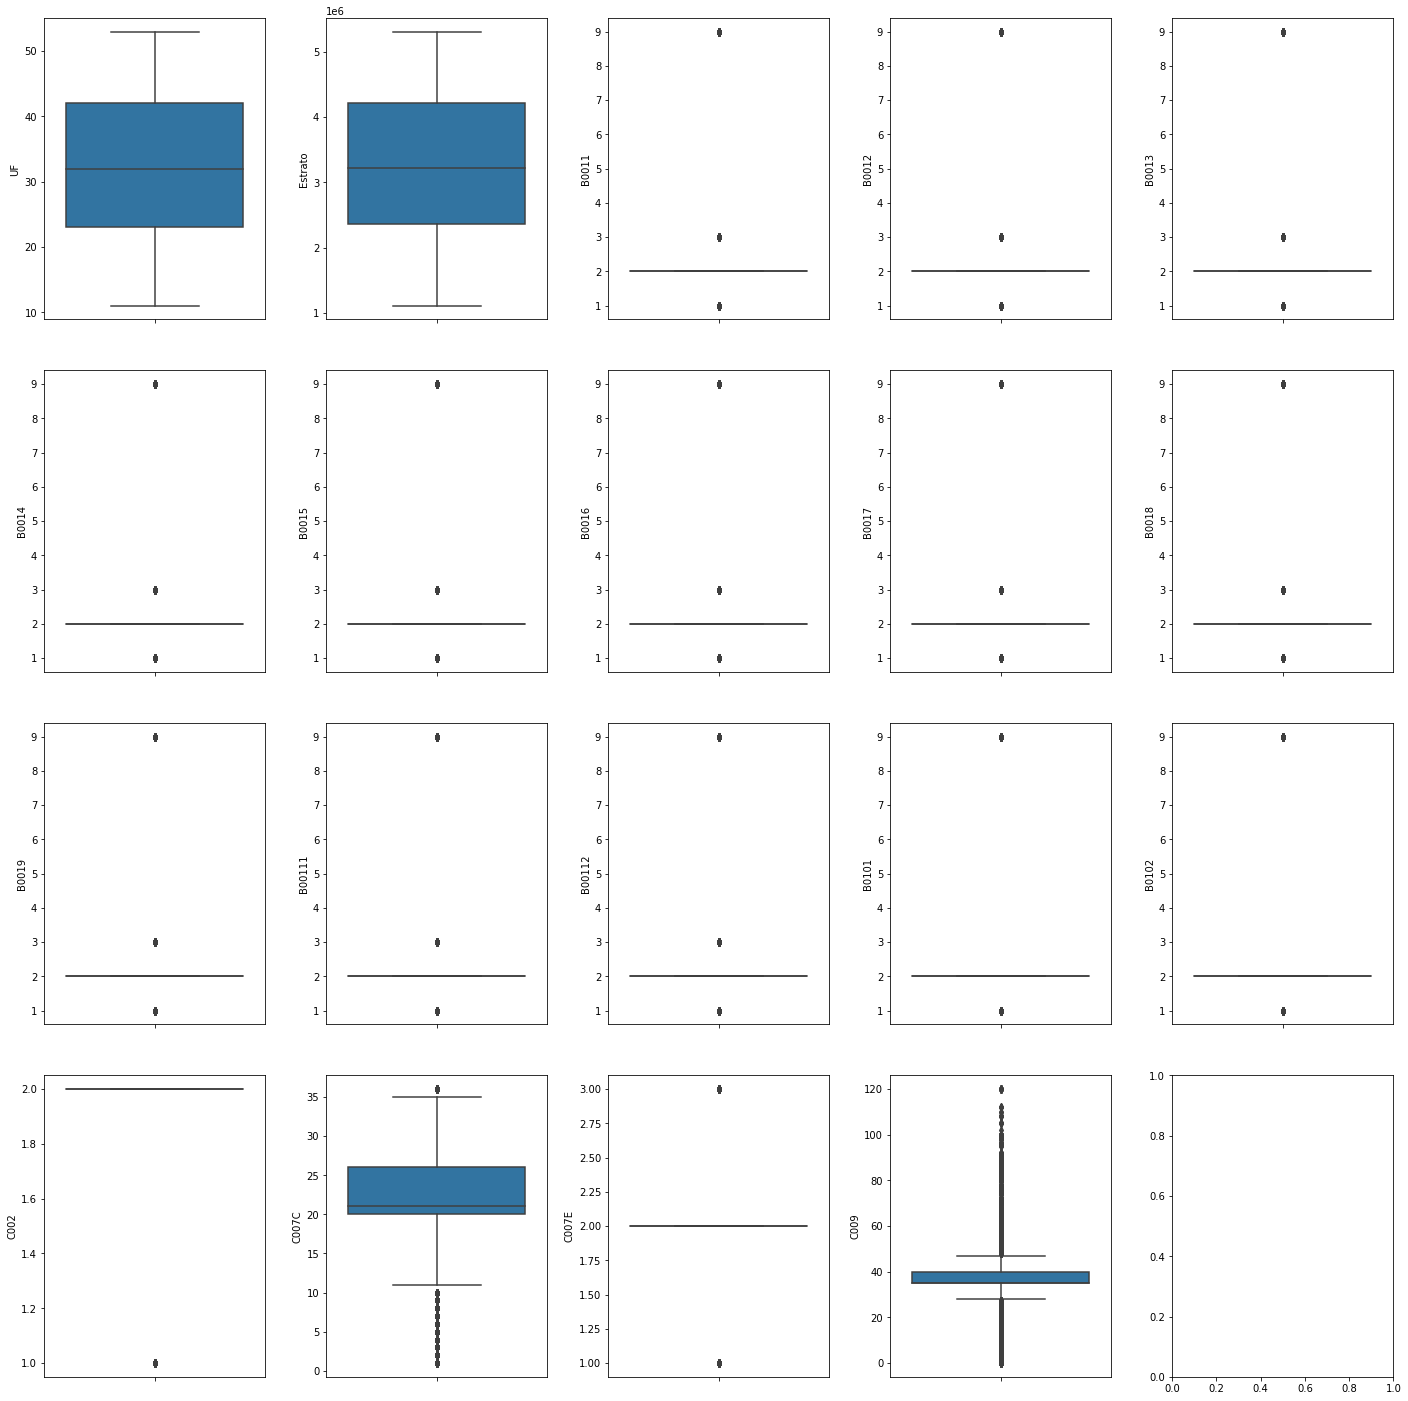

In [20]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20, 10))
index = 0
ax = ax.flatten()
fig.set_figheight(20)
fig.tight_layout(pad=3.0)

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

Most of the columns have strict amount of values, so there is no need at their blox-plots. The other ones don't have problems with distribution.

### Distribution plots

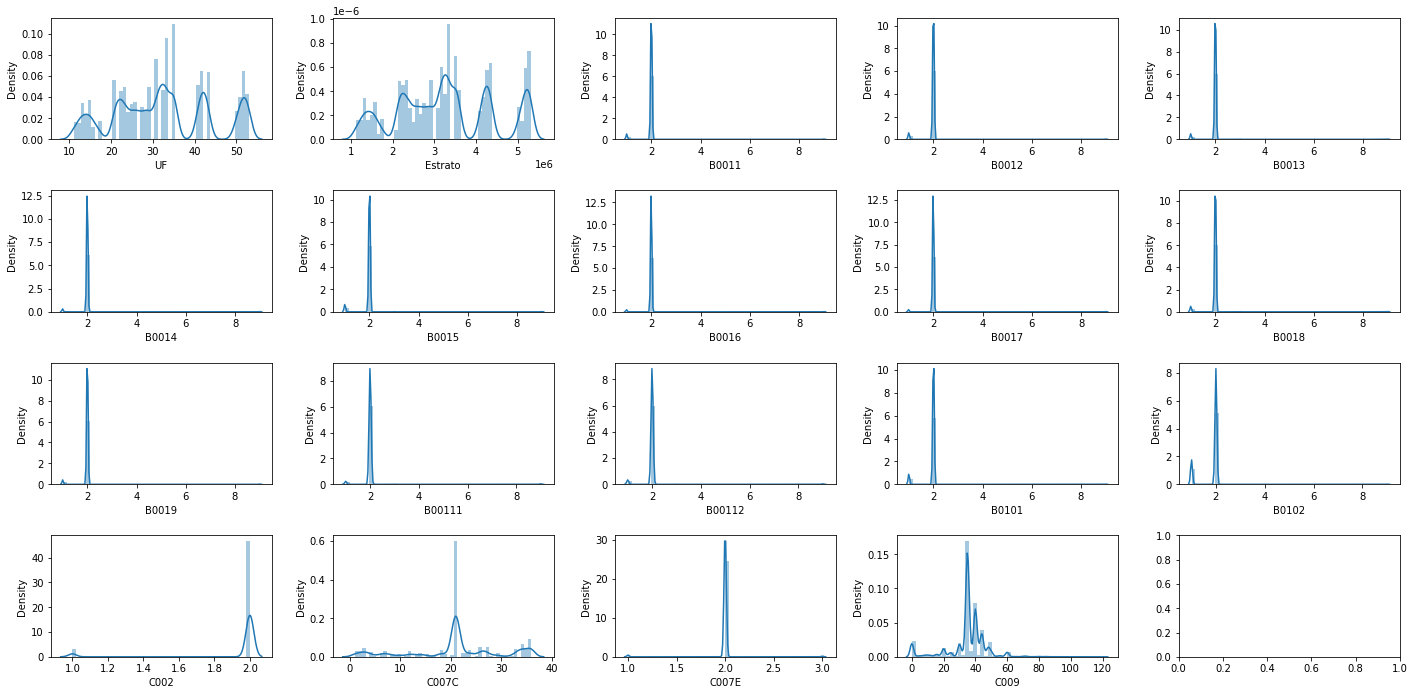

In [21]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20, 10))
index = 0
ax = ax.flatten()
fig.tight_layout(pad=3.0)

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

In [13]:
df["Labels"] = labels
df = df[df["C009"] < 80]
labels = df["Labels"]
df.drop("Labels", axis=1, inplace=True)

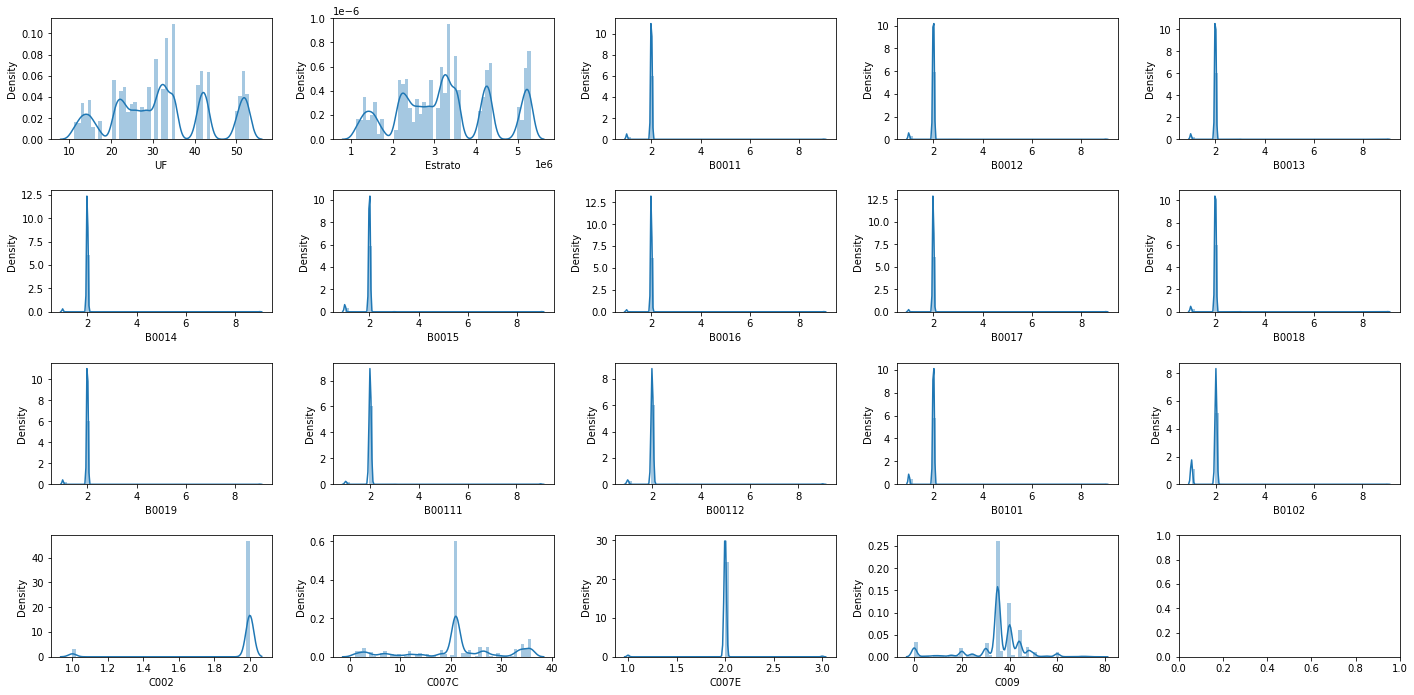

In [23]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20, 10))
index = 0
ax = ax.flatten()
fig.tight_layout(pad=3.0)

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

Now the problems with outlayers are solved.

### Oversampling

<AxesSubplot:xlabel='Labels', ylabel='count'>

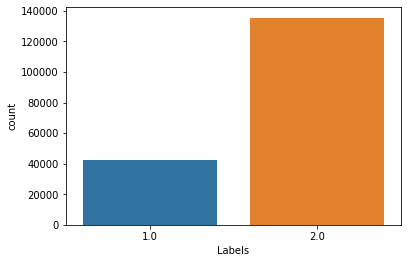

In [24]:
sns.countplot(labels)

There are also no problems with oversampling too.

### The final dataset and labels.

In [14]:
df

,UF,Estrato,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00111,B00112,B0101,B0102,C002,C007C,C007E,C009
730581,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1.0,18.0,2.0,0.0
730594,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,8.0,2.0,44.0
730605,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1.0,14.0,2.0,0.0
730606,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,21.0,2.0,35.0
730607,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,21.0,2.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650393,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,21.0,2.0,35.0
2650394,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,21.0,2.0,35.0
2650395,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,1.0,2.0,40.0
2650423,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,21.0,2.0,36.0


In [15]:
labels

730581     2.0
730594     2.0
730605     2.0
730606     2.0
730607     2.0
          ... 
2650393    1.0
2650394    1.0
2650395    1.0
2650423    2.0
2650424    2.0
Name: Labels, Length: 178226, dtype: float64

 # 3 - Modelling the likelihood of being COVID-19 positive from data

We are going to create 3 models` Random Forest Classifier, K Nearest Neighbour and Gradient Boosting Classifier. We will compare the performances of those 3 models and will use the best one for our final evaluations.

In [16]:
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
models = ["Random Forest Classifier", "KNN", "Gradient Boosting Classifier"]
coefs = dict()

for model in models:
    coefs[model] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall | Sensitivity": 0,
        "Specificity": 0,
        "Negative predictive value": 0
    }


def perf_measure(y_actual, y_hat):   
    TP, FP, TN, FN = 0, 0, 0, 0

    for i in range(len(y_actual)):
        if y_hat[i] == 2 and y_actual[i] == 2:
            TP += 1
        elif y_hat[i] == 2 and y_actual[i] == 1:
            FP += 1
        elif y_hat[i] == 1 and y_actual[i] == 1:
            TN += 1
        elif y_hat[i] == 1 and y_actual[i] == 2:
            FN += 1
        
    return TP, FP, TN, FN


def return_metrics(tp, fp, tn, fn):
    metrics = list()

    metrics.append(round(((tp + tn) / (tp + tn + fp + fn)), 2))
    metrics.append(round((tp / (tp + fp)), 2))
    metrics.append(round((tp / (tp + fn)), 2))
    metrics.append(round((tn / (tn + fp)), 2))
    metrics.append(round((tn / (tn + fn)), 2))

    return metrics


def update_metrics(metrics, model):
    coefs[model]["Accuracy"] = metrics[0]
    coefs[model]["Precision"] = metrics[1]
    coefs[model]["Recall | Sensitivity"] = metrics[2]
    coefs[model]["Specificity"] = metrics[3]
    coefs[model]["Negative predictive value"] = metrics[4]


def print_metrics(metrics):
    print("Accuracy:", metrics[0])
    print("Precision:", metrics[1])
    print("Recall | Sensitivity:", metrics[2])
    print("Specificity:", metrics[3])
    print("Negative predictive value:", metrics[4])

## 3.1 - Creating "Random Forest" classifier

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2,random_state=109) 

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

tp, fp, tn, fn = perf_measure(y_test.tolist(), y_pred.tolist())
metrics = return_metrics(tp, fp, tn, fn)
update_metrics(metrics, "Random Forest Classifier")
print_metrics(metrics)

Accuracy: 0.81
Precision: 0.84
Recall | Sensitivity: 0.93
Specificity: 0.44
Negative predictive value: 0.68


### Double checking for accuracy with cross validation

In [34]:
scores = cross_val_score(RandomForestClassifier(random_state=0), df, labels, cv=5)
print("Scores: ", scores)
print ('Random forest average score:', np.asarray(scores).mean())

Scores:  [0.79358133 0.83254313 0.83604994 0.82847524 0.8202553 ]
Random forest average score: 0.8221809870594614


The check passes normally, so Random Forest is pretty good classifier as it gives results overally higher than 82%

### Confusion matrix of expected results and predictions

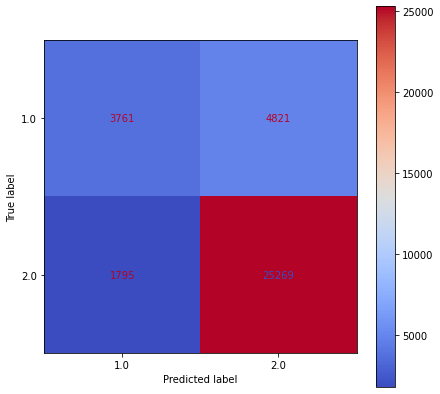

In [35]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(rf_clf, X_test, y_test, ax=ax, cmap="coolwarm")

## 3.2 - Creating "K Nearest Neighbour" classifier

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2,random_state=109) 

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

tp, fp, tn, fn = perf_measure(y_test.tolist(), y_pred.tolist())
metrics = return_metrics(tp, fp, tn, fn)
update_metrics(metrics, "KNN")
print_metrics(metrics)

Accuracy: 0.77
Precision: 0.82
Recall | Sensitivity: 0.9
Specificity: 0.36
Negative predictive value: 0.53


### Double checking for accuracy with cross validation

In [41]:
scores = cross_val_score(KNeighborsClassifier(), df, labels, cv=5)
print("Scores: ", scores)
print ('KNN average score:', np.asarray(scores).mean())

Scores:  [0.75074342 0.79231309 0.78978819 0.77724786 0.77542432]
KNN average score: 0.7771033763870309


KNN also performs great, but it is a little bit worse than Random Forest` overall score here is 77%

### Confusion matrix of expected results and predictions

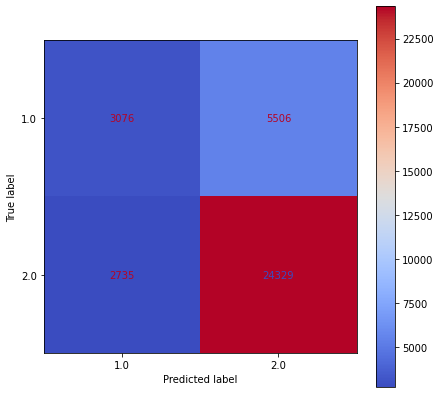

In [42]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(knn_clf, X_test, y_test, ax=ax, cmap="coolwarm")

## 3.3 - Creating "Gradient Boosting" classifier

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2,random_state=109) 

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

tp, fp, tn, fn = perf_measure(y_test.tolist(), y_pred.tolist())
metrics = return_metrics(tp, fp, tn, fn)
update_metrics(metrics, "Gradient Boosting Classifier")
print_metrics(metrics)

Accuracy: 0.77
Precision: 0.77
Recall | Sensitivity: 0.99
Specificity: 0.09
Negative predictive value: 0.69


### Double checking for accuracy with cross validation

In [52]:
scores = cross_val_score(GradientBoostingClassifier(), df, labels, cv=5)
print("Scores: ", scores)
print ('Gradient Boosting Classifier average score:', np.asarray(scores).mean())

Scores:  [0.78283678 0.77393744 0.76978538 0.76675551 0.76821434]
Gradient Boosting Classifier average score: 0.772305889539717


Gradient boosting gave a slightly worse results than KNN, again a little bit higher than 77%

### Confusion matrix of expected results and predictions

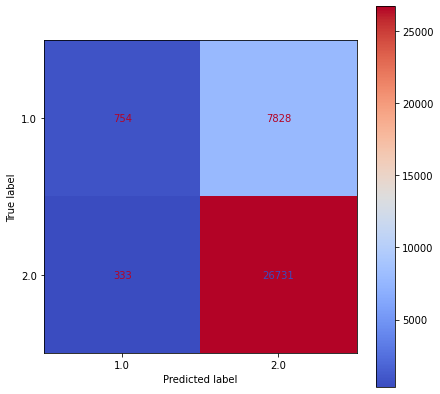

In [53]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(gb_clf, X_test, y_test, ax=ax, cmap="coolwarm")

# 4 - Comparison of different modelling approaches and validation

## 4.1 -  Comparison of created models

In [59]:
table = pd.DataFrame(coefs).transpose()
table

,Accuracy,Precision,Recall | Sensitivity,Specificity,Negative predictive value
Random Forest Classifier,0.81,0.84,0.93,0.44,0.68
KNN,0.77,0.82,0.90,0.36,0.53
Gradient Boosting Classifier,0.77,0.77,0.99,0.09,0.69


Random Forest is surely the best option for the final model, as it is the leader by almost all the scores.

## 4.2 - Final model creation

Doing hyperparameter tuning to get the best parameters.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.15,random_state=109) 

param_grid = {"criterion": ["gini", "entropy"],
            "n_estimators": [50, 100, 150, 200],
            "min_samples_split": [2, 3, 4]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, n_jobs=2)
rf_clf = grid_search.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
rf_clf.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_split=3,
                       n_estimators=200, random_state=0)

Now we will train the model on the dataset we created, where the labels are available, and then will make predictions on the all months datasets combined.

## Training the final model

In [19]:
final_model = rf_clf.best_estimator_
final_model.fit(df, labels)

RandomForestClassifier(criterion='entropy', min_samples_split=3,
                       n_estimators=200, random_state=0)

Checking the performance of the final model

In [74]:
score = final_model.score(df, labels)
score

0.8861333363257886

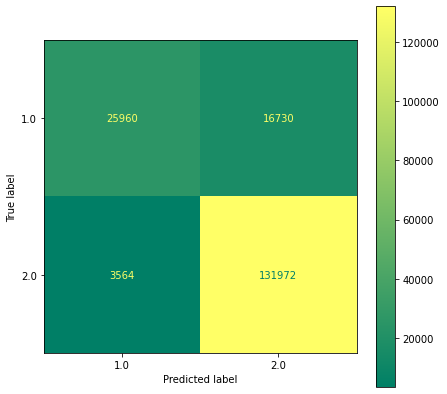

In [75]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(final_model, df, labels, ax=ax, cmap="summer")

We get very good results, so now we can make the final predictions for the whole dataset.

In [25]:
final_df = pd.DataFrame(columns=df_11.columns)
final_df = final_df.append([df_05, df_06, df_07, df_08, df_09, df_10, df_11], ignore_index=True)
final_df = final_df[first + second]
final_df = final_df.fillna(round(final_df.mean()))
final_df

,UF,Estrato,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00111,B00112,B0101,B0102,C002,C007C,C007E,C009
0,11,1110011,1,1,2,2,1,2,2,2,2,1,2,2.0,2.0,2.0,35.0,1.0,48.0
1,11,1110011,1,1,2,2,2,2,2,2,2,1,2,2.0,2.0,2.0,34.0,1.0,4.0
2,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,19.0,1.0,33.0
3,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,19.0,1.0,33.0
4,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,19.0,1.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650454,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,1.0,1.0,2.0,1.0,0.0
2650455,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1.0,8.0,1.0,0.0
2650456,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,19.0,1.0,33.0
2650457,53,5310220,2,2,2,2,2,2,2,2,2,2,2,1.0,1.0,2.0,19.0,1.0,33.0


In [26]:
probs = [prob[0] for prob in final_model.predict_proba(final_df)]
len(probs)

2650459

In [27]:
final_df["Probability"] = probs
final_df

,UF,Estrato,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00111,B00112,B0101,B0102,C002,C007C,C007E,C009,Probability
0,11,1110011,1,1,2,2,1,2,2,2,2,1,2,2.0,2.0,2.0,35.0,1.0,48.0,0.400833
1,11,1110011,1,1,2,2,2,2,2,2,2,1,2,2.0,2.0,2.0,34.0,1.0,4.0,0.654583
2,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,19.0,1.0,33.0,0.493633
3,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,19.0,1.0,33.0,0.493633
4,11,1110011,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,19.0,1.0,33.0,0.493633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650454,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,1.0,1.0,2.0,1.0,0.0,0.567048
2650455,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1.0,8.0,1.0,0.0,0.157333
2650456,53,5310220,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,19.0,1.0,33.0,0.332237
2650457,53,5310220,2,2,2,2,2,2,2,2,2,2,2,1.0,1.0,2.0,19.0,1.0,33.0,0.154862


So, the last column in the dataset, which is called "Probability" shows the probability of being infected by COVID.

# 5 - Outcome of the project

Predicting COVID is very complicated task, because the virus is new to us and it is difficult to find the most important variables.
The initial step of the project was just to create some charts and graphs to get acquainted with the data. 
Later came filtering some of the features by logic, because they surely don't have any connection with COVID-19. After it we applied some mathematical tactics to keep only the most important ones. Particularly, we used correlation of the features with the target variable.
After feature selection 3 different models were created and Random Forest classifier was the one with the best performance. Later hyperparameter tuning was applied to it, and the final model was created, which is a tool that can work with any amount of data. It returns the probability that the person is infected just by getting the necessary information from each row. It can be a powerful tool for preventing a large spread of the virus and detecting COVID in early stages.
